# MNIST classification using distance

## matrix addition

Vectors and matrices (plural of matrix) are arrays of numbers and the basic objects of interest in linear algebra. A matrix is a 2D array consisting of *m* rows and *n* columns. Our convention will always be to list rows first, and columns second (conveniently matching the convention in Python.) Vectors will always be assumed to be a column vectors, unless otherwise stated.

We can add any two matrices, $A$ and $B,$ (or vectors) together as long as they have the same shape, meaning the same number of rows and columns. In this case the addition is entry wise, so that the numbers in the same positions in each matrix are added to together, giving the sum of the two entries as the value in the same position in resulting matrix sum.

Let $A =
\begin{bmatrix}
a & b \\
c & d \\
\end{bmatrix}
$ and
$
B=
\begin{bmatrix}
e & f \\
g & h \\
\end{bmatrix}
.$
Then $A + B =
\begin{bmatrix}
a+e & b+f \\
c+g & d+h \\
\end{bmatrix}
.$

Note, we have to be careful with the word dimension(s).  The English word *dimensions* refers to the shape of a matrix, given by the number of rows and columns. *Dimension* has a different meaning in linear algebraic terms, denoting the number of *linearly independent* vectors needed to span a vector space. A vector space $\mathbb{R}^n$ has dimension $n,$ which is also the length of any vector in $\mathbb{R}^n.$



Be aware of this distinction when reading from different sources. We can always use shape to avoid confusion when talking about the number of rows and cols of a matrix if needed. Shape is also is as the command in Python to determine the number of rows and columns of an array.

## matrices in Python

For real world computations with larger (higher dimensional) vectors and matrices we need more powerful computational tools, than performing these operations by hand. Of course we need to understand the mechanics of the operations, but in general we will use computational tools, specifically Python, as needed.

The following cells are code cells in this Jupyter notebook (instead of markdown cells.) This will be a typical format for using Jupyter notebooks. We use markdown cells to write our notes and ideas down in an easy to read format, interspersed with code cells (Python) to run code and test ideas on the machine. We always will have a first code cell loading additional Python packages that we need for various additional functionality. Our main add-ons here will by `numpy`, and `matplotlib`.

Once we have loaded these packages and run the cell, we will have access to commands from them for our session. Each time we begin a session we rerun the cells.

In [2]:
# standard packages to load
import numpy as np
import matplotlib.pyplot as plt

### example

Define a $3 \times 4$ matrix $A$ as 

$$
A=
\begin{bmatrix}
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8 \\
9 & 10 & 11 & 12
\end{bmatrix}
.$$

For individual entries we use $a_{i,j}$ (or $a_{ij}$) to indicate the number in the *i*th row and *j*th column of $A.$ For column vectors we write the *j*th column of $A$ as $\textbf{a}_j.$ In both cases our notation mimics our Python code, `a[i,j]`, and `a[:,j]` respectively for an entry or vector from the array.

Usually we start counting from 1 so that the first item on a list has the label 1. We will stick with this convention for written labels. Since we will be using Python for computing, realize that we start counting at zero. So the 1,1 entry of $A$ is $a_{1,1} = 1$.

We still use the word 'first' to indicate the first element or row (and not the word 'zeroth',) even though we use a zero in the subscript so that the first column vector of $A$ is given by
$
\textbf{a}_1 =
\begin{bmatrix}
1 \\ 5 \\ 9
\end{bmatrix}.
$

We can also represent vectors as 'tuples.' Note, a tuple is both a type in Python and also a linear algebra term. Usage depends on context. Unless otherwise stated, we are using terms in the linear algebra sense. So $\textbf{a}_1$ as a triple (3-tuple) is written as $\textbf{a}_1 = (1, 5, 9).$ Writing column vectors as tuples has the advantage of saving space in our written document. Always ask questions on notation sooner than later to clear up confusion. 'Fixing' notation is important so we have the same conventions and the same starting point for communicating and describing these objects. There is not a single standard or convention, so be careful when using other resources.

Always be careful with indexing. Many resources start counting at 1.  We will also starting counting at 1 in our written work, and realize that our indices in Python are zero-based.

We can enter our matrix $A$ from the example as follows, and we can access individual entries, columns, and rows using code similar to our naming convention descibed earlier. Run the following code cells to check your answers for question 1.

In [4]:
#example 0 in code
A = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])
print(type(A))
print(A)

<class 'numpy.ndarray'>
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


### 1. Answer each of the following
Use the block notation below each question for your response.

> The right angle ">" starts a block in markdown. Put your answers in block to the questions below. 


#### 1a.  What is second column of $A?$

> (2, 6, 10)


#### 1b. Add the first two columns of $A$ together to produce the vector $x.$

> (3, 11, 19)


#### 1c. Add the last two rows of $A$ together. What do you get? 

> (7, 15, 23)


#### 1d. What are the dimensions (shape) of $A?$ How are the number of entries of the column and row vectors related to the shape of $A$? Describe.

> There are 3 rows and 4 columns in A. A is made of 4 column vectors and 3 row vectors. Thus A is 3X4 vector.


### matrix as an image

We can image our matrix in 8-bit grayscale where each number in the matrix represents the intensity value of an individual pixel. These values typically have integer values between 0 and 255, with 0 being black, 255 being white, and 254 shades of gray in between. Note that $2^8$ is 256, hence 8-bit grayscale for the number of bits (0 or 1) representing 256 different grayscale intensities. There are 8 bits in 1 byte, so each pixel in a grayscale image is 1 byte of information.

The following code uses the `matplotlib` package and `pyplot` library to image our matrix.

In [7]:
#dimensions of A
print(A, A.shape)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] (3, 4)


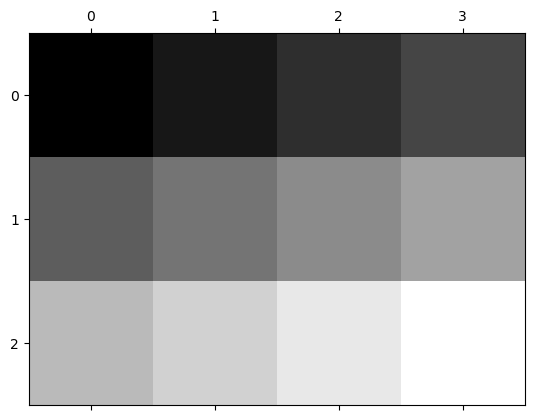

In [9]:
plt.close('all')
plt.matshow(A, cmap=plt.get_cmap('gray'))
plt.show()

Now, our values only range between 1 and 12. But 1 seems to be black in the upper left corner of our matrix, and the lower right value of 12 appears white? What is going on? The commands `matshow` and `imshow` both automatically scale the max and min values into the color range of 0 to 255. The word scaling and scalar are effectively the same for us. We will use scalar multiplication to scale each matrix value into the correct place on a 0 to 255 scale. How? 

### 2. How would you scale the values by hand?

First write pseudocode that scales any finite range (interval) of real numbers into the interval from 0 to 255. Write your pseudocode in the markdown cell below. Think about what you need to do with each value between the minimum and maximum values in the matrix, including the minimum and maximum.

In [ ]:
# Write down pseudo code in this cell scale the entries of the matrix into 0 to 255. 
# Use hashtags as comments to outline the steps you need.

# find the min number in the array (array_min)
# find the max number in the array (array_max)
# let's say that the current number to be scales is (array_current)
# then use the following math:

# scaled_number = ((array_current - array_min) / (array_max - array_min)) * 255

### 3. How can you "invert" the color scheme?

Come up with pseudocode to "flip" the grayscale intensities from black to white and white to black. What needs to happen to each entry? How can you do this with basic math operations on each entry? Put your pseudocode in the code cell below. 

In [ ]:
# Write down pseudo code in this cell for inverting the gray scale. 
# Use hashtags as comments to outline the steps you need.

# to invert, we just subtract each scaled_number with 255.
# so 255 becomes 0 and 0 becomes 255.
# inverted_value = 255 - scaled_number

### 4. Test your code on the example matrix $A$.

Test your ideas for scaling into and inverting the gray scale on the example

$$
A=
\begin{bmatrix}
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8 \\
9 & 10 & 11 & 12
\end{bmatrix}
.$$

Use the code cell(s) below to demonstrate each.

In [11]:
# Show working code that scales A into 0 to 255.
max = np.max(A)
min = np.min(A)
scaled_matrix = ((A - 1)/(max - min))*255

# i am converting to integer just for print, i will not be using rounded values anywhere
# astype function reference: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html
matrix_int = scaled_matrix.astype(int)
print(matrix_int)

[[  0  23  46  69]
 [ 92 115 139 162]
 [185 208 231 255]]


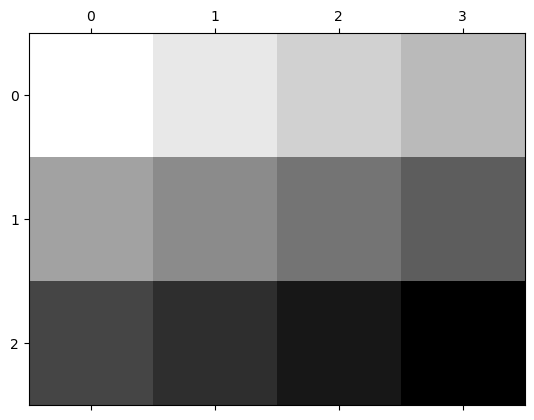

In [13]:
# Show working code that inverts A. Use imshow from the example above.
inverted_matrix = 255 - scaled_matrix

plt.close('all')
plt.matshow(inverted_matrix, cmap=plt.get_cmap('gray'))
plt.show()

### 5. Invert the tiger image using the same ideas! (and code)

Can you invert the following tiger image using the same ideas? Show code in a new code cell.

In [15]:
from scipy import io
tigerGray = io.loadmat('tigerGray.mat')
sorted(tigerGray.keys())
tiger = tigerGray['tigerGray']

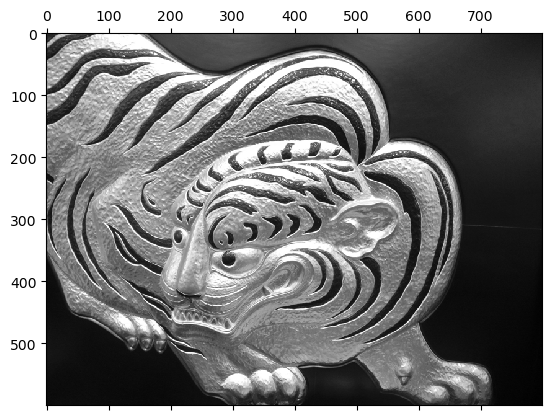

In [17]:
plt.close('all')
plt.matshow(tiger, cmap=plt.get_cmap('gray'))
plt.show()

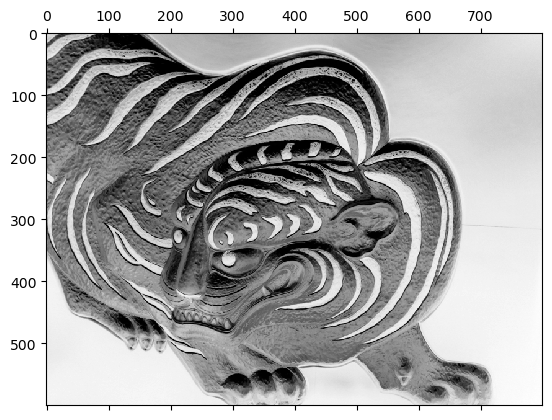

In [19]:
# Code here to invert and image the tiger!
inverted_tiger = 255 - tiger
plt.close('all')
plt.matshow(inverted_tiger, cmap=plt.get_cmap('gray'))
plt.show()

## MNIST data set of handwritten digits

The modified NIST data set of handwritten images is a subset of the original NIST data set made available by Yann LeCun and Corinna Cortes. It is a standard data set for investigating intro pattern recmognition tasks with minimal preprocessing. (Google MNIST to learn more. Also in Ch 4 of Tim Chartier's "When Life is Linear.")

Data files in this folder contain training and test images as well as labels of the digits. Our small files contain the first 100 training images, and first 10 test images with labels. Each image is a $28 \times 28$ matrix of grayscale values.

### Training images

We load our training set and image the first matrix of the array using the following code cells.


In [21]:
# Load file of first 100 training images. 
B = np.load('mnist_image_train_100.npy')

# And first 10 test images
C = np.load('mnist_image_test_10.npy')

In [27]:
# Check the shape of B and C.
B.shape
C.shape

(10, 28, 28)

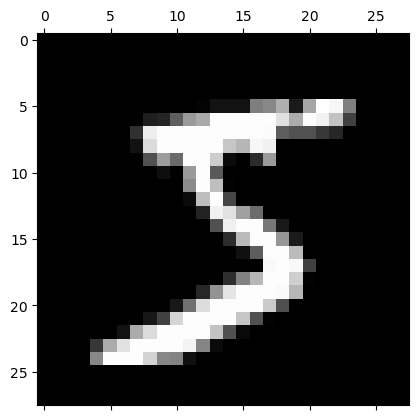

In [29]:
# code to image a matrix
# first training image in B
plt.close('all')
plt.matshow(B[0], cmap=plt.get_cmap('gray'))
plt.show()

In [31]:
# commands to get max and min values.
B[0].min(), B[0].max()

(0, 255)

It looks like the MNIST data is already scaled into 0 to 255. We have a $28 \times 28$ square matrix of (integer) values between 0 and 255 that appear to be a hand-written number "5" in our image. The first dimension or axis in our image  training file is essentially a label for an array, with the second two dimensions (both 28) being the dimensions (rows and columns) of the $28 \times 28$ matrices of hand-written digits. We can print out the matrix of this first digit. Be careful with large matrices! 

In [33]:
# first matrix of our training array
B[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### Can we invert this image to a "negative"?

Check out and run the code below.

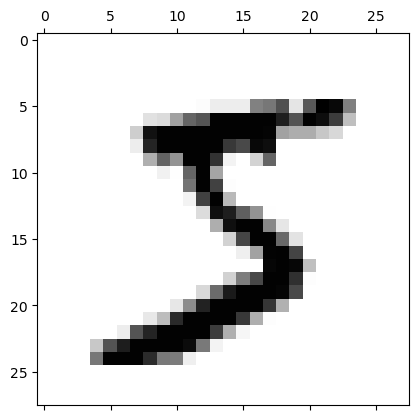

In [35]:
# Create a new matrix that is the "negative" of B[0].
# You will need some new commands here. Ask "AFTER" you have thought about "HOW" to implement this idea.
B0=B[0]
B0neg=255-B0
plt.close('all')
plt.matshow((255-B0), cmap=plt.get_cmap('gray'))
plt.show()

### Labels

Loading the `mnist_label_train_100.py` file gives the corresponding labels for each training set image. It is a vector of length 100, containing labels for our 100 training images. Note, length here is the number of entries in the vector and not our usual Euclidean norm (2-norm.)

The first training image is indeed a hand-written "5".

In [39]:
# load labels for training images
B_label = np.load('mnist_label_train_100.npy')

# load labels for test images
C_label = np.load('mnist_label_test_10.npy')

In [41]:
# shape command in this case shows a vector of length 100.
B_label.shape

(100,)

In [43]:
# label for first image
B_label[0]

5

In [53]:
# The entire vector of labels
B_label
C_label

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

### 6. Answer the following

#### a. Which digits are represented in the training set (array B)?

> The matrix of particular training image in each vector of array B

#### b. Which digits are represented in the test set (array C)? State where they fall on the list. 

For example we have `C[2] = C[5] = 1`, and `C[3] = 0`.

> Array C represents the test images that contain the numbers 7,2,1,0,4,1,4,9,5,9. Each is the test image for the number that it respresents.

#### c. What issues may arise given the test and training set values that are represented?

> There are multiple test images representing same number and multiple training images for same number. This many-to-many relation may bring some issue recognizing the exact match. Likewise, same handwritten number may look like two different numbers for example: 9 and 0.

#### d. Of the digits listed in the test set, which hand-written digits do you expect could be mistaken for one another?

> 7 could be mistaken for 2 and vice versa. 9 could be mistaken for 0 and vice versa


### 7. What does an average digit look like?

How might we make an "average" digit from our training set information? Describe your ideas in the markdown cell below. And then try to implement your ideas in code in the code cell below the markdown cell. Only choose a digit that actually occurs in the test set.

> Answer here.
> We have B_label that contains the digits that are in the training images. Thus, for every image that we want to average, we would use the label to find the index of where it is located in the training images. After that, we would add all those training images and divide it by the total number of images which gives us mean/average for each element that will result in average vector.


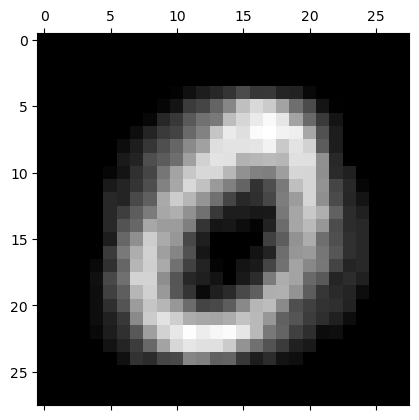

In [329]:
digit_to_average = 0

# this list stores the indexes of all the
indexes_of_training_images = []

# this loop finds the indexes of all the digit_to_average and stores in list above
for index, digit in enumerate(B_label):
    if digit == digit_to_average:
        indexes_of_training_images.append(index)
        
######################################################
# THIS WAS MY ATTEMPT BEFORE I FOUND OUT ABOUT numpy.mean()
# now we find the average
# total_count = len(indexes_of_training_images)
# summed_matrix = B[indexes_of_training_images[0]]

# for i in range(1,total_count):
#     summed_matrix += B[indexes_of_training_images[i]]

# average_image = summed_matrix * (1/total_count)
######################################################

# this list will hold all the training images for the given number
all_images = []
for index in indexes_of_training_images:
    all_images.append(B[index])

average_image = np.mean(all_images, axis=0)

# the print part
plt.close('all')
plt.matshow(average_image, cmap=plt.get_cmap('gray'))
plt.show()

# comments:
# index 2 is breaking things here for digit: 4

### How "close" is a test digit to the "average" you constructed?

Well, first we need to say what we mean by "close" here in relation to notions of "distance."  Essentially we are talking about "distance" as defined by a norm in our vector space. The 2-norm, or Euclidean norm is an extension of a straight line distance. On a line this distance is measured as an aboslute value of the difference between to points on line, say $|x_1 - x_2 |.$ In two-dimensional space, i.e. the plane $\mathbb{R}^2,$ we are talking about the Pythagorean theorem looking at the distance between points $(x_1,y_1),(x_2,y_2)$ in the usual way. Since we are considering the mnist images as vectors in $\mathbb{R}^{784},$ the distance is given by the norm of the difference of the two vectors,

$$ || \textbf{v}_1 - \textbf{v}_2 || .$$


In words this is "the square root of the sum of squares of the pairwise differences!" Write it down for yourself using your previous definition of distance from the dot product. 

First we'll do something a bit easier by comparing an individual test image versus each training image by finding the "closest" training image from our training set.

In [240]:
# Example for test digit "0" when n = 5.
# print(len(C_label))
# choose test digit from list
n = 9

print(C_label[n])
test = C[n].reshape(784, 1)

# d is an arbitrarily large distance tolerance
d = 1000000

# k is a placeholder/counter to keep track of the closest digit from the training list
k = 0

# Start loop to check distance between test digit and each training digit
for i in range(100):
    #Calculate distance between test and training digits
    d1 = np.linalg.norm(( test - B[i].reshape(784, 1) ))
    if d1 < d:
        d = d1
        k = i

print(d)
print(k)
print(B_label[k])

if C_label[n] == B_label[k]:
    print("Your test digit", C_label[n], "matched the training digit", B_label[k], "in position", k, "correctly.")
else: 
    print("Your test digit", C_label[n], "did NOT match the correct training digit. You matched", B_label[k], 
               "in position", k, "instead.")

9
1975.40502176136
57
9
Your test digit 9 matched the training digit 9 in position 57 correctly.


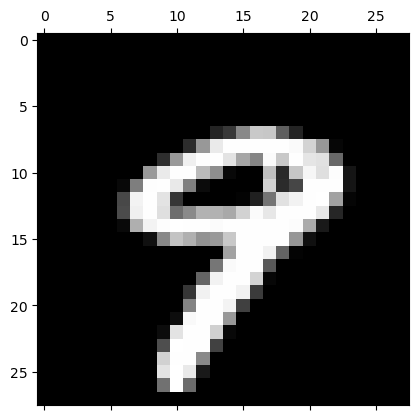

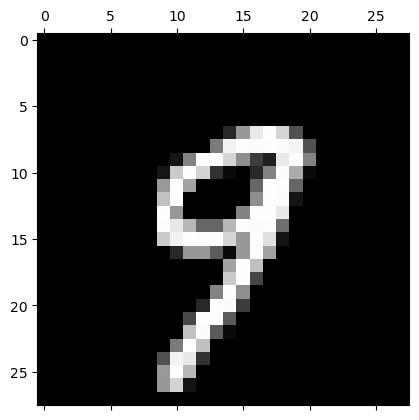

In [226]:
# You can image test or training digits using previous examples and the following examples.
# Will display current n and k.

plt.close('all')
plt.matshow(C[n], cmap=plt.get_cmap('gray'))
plt.show()

plt.matshow(B[k], cmap=plt.get_cmap('gray'))
plt.show()

### 8. Your turn

You have code that performs comparisons for the zero test digit. Repeat your numerical comparisons for the remaining digits including both digits for 1, 4, and 9.

Write up a commentary of what you find. Note any tests that fail and include specifics. Also include images of all failures and at least two interesting (to you) matches. Use the code cell below for adding extra tests.

Finally, do you think an average digit might perform better? Why or why not? (We may do this later. This is enough for now!)

Index 0
> Digit: 7
> Test digit 7 matched the training digit 7 in position 84 correctly
> Comment: Test and closest training image looked identical

Index 1
> Digit: 2
> Test digit 2 matched the training digit 2 in position 82 correctly
> Comment: Test image was a roman font and the resulting closest training image was a devnagari font

Index 2
> Digit: 1
> Test digit 1 matched the training digit 1 in position 72 correctly
> Comment: They were both almost identical but were not straight lines

Index 3
> Digit: 0
> Test digit 0 matched the training digit 0 in position 37 correctly
> Comment: They were also almost idential. Closest training image was thinner and slanted than the test image

Index 4
> Digit: 4
> Test digit 4 matched the training digit 4 in position 92 correctly
> Comment: They were also very identical but the test image had more round edge than the closest training image

Index 5
> Digit: 1
> Test digit 1 matched the training digit 1 in position 99 correctly
> Comment: The only difference between the test image in index 5 and index 2 is the thickness. But they both resulted different versions of 1.

Index 6
> Digit: 4
> Test digit 4 matched the training digit 4 in position 58 correctly
> Comment: The difference in test image at index 4 and 6 is: index 4 is regular 4 with curved edge and at index 6 is fancy with curvy ending. The first one resulted in thinner 4 but second one resulted in thicker. That is because the curve part at the end was considered as thickness which matched with the thicker 4.

Index 7:
> Digit: 9
> Test digit 9 matched the training digit 9 in position 45 correctly
> Comment: Although the test image was a slanted 9 the resulting training image was a regular 9.

**Index 8:**
> Digit: 5
> Your test digit 5 did NOT match the correct training digit. You matched 0 in position 34 instead.
> Comment: The test image provided was a 5 but doesn't look like 5 because the connection to form a 5 is split. Also, the bottom part of 5 is connected making it like a circle. Therefore, instead of matiching with a 5, it matched with a 0. Looking at the test image, it also looks a little like 6 but the link is broken so it matched with a 0 instead.

Index 9:
> Digit: 9
> Your test digit 9 matched the training digit 9 in position 57 correctly
> Comment: This test image 9 resulted in different training image 9 than the previous because this one is not slanted. Also, this one has a small cut between the space at 9.